# Import packages and load data

In [102]:
# Import necessary packages
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Specify path for data
path = r'/Users/kggiorno/Desktop/spring/capstone1/data'                 
all_files = glob.glob(os.path.join(path, "*.csv"))

# Load each file into df and concatenate into single df
df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, axis=0, ignore_index=True)

concatenated_df = concatenated_df.rename(columns=lambda x: x.strip())

concatenated_df.head()
print(concatenated_df.shape)
print(concatenated_df.columns)

(23218, 29)
Index(['RIN', 'Primary Key', 'Date Occurred', 'Time Occurred', 'Location',
       'Area Command', 'Nature of Contact', 'Reason Desc', 'R2R Level',
       'Master Subject ID', 'Subject Sex', 'Subject Race', 'Subject Ethnicity',
       'Subject Conduct Desc', 'Subject Resistance', 'Weapon Used 1',
       'Weapon Used 2', 'Weapon Used 3', 'Weapon Used 4', 'Weapon Used 5',
       'Number Shots', 'Subject Effects', 'Effect on Officer',
       'Officer Organization Desc', 'Officer Commission Date',
       'Officer Yrs of Service', 'X-Coordinate', 'Y-Coordinate',
       'CouncilDistrict'],
      dtype='object')


In [103]:
# Check for null values
concatenated_df.isnull().any()

RIN                          False
Primary Key                  False
Date Occurred                False
Time Occurred                 True
Location                     False
Area Command                  True
Nature of Contact             True
Reason Desc                   True
R2R Level                     True
Master Subject ID             True
Subject Sex                   True
Subject Race                  True
Subject Ethnicity             True
Subject Conduct Desc          True
Subject Resistance            True
Weapon Used 1                 True
Weapon Used 2                 True
Weapon Used 3                 True
Weapon Used 4                 True
Weapon Used 5                 True
Number Shots                  True
Subject Effects               True
Effect on Officer             True
Officer Organization Desc     True
Officer Commission Date       True
Officer Yrs of Service       False
X-Coordinate                  True
Y-Coordinate                  True
CouncilDistrict     

In [104]:
# Check amount of null values
concatenated_df.isnull().sum()

RIN                              0
Primary Key                      0
Date Occurred                    0
Time Occurred                  871
Location                         0
Area Command                    35
Nature of Contact               19
Reason Desc                     22
R2R Level                       26
Master Subject ID              179
Subject Sex                    729
Subject Race                   729
Subject Ethnicity             1021
Subject Conduct Desc          4898
Subject Resistance              34
Weapon Used 1                   91
Weapon Used 2                22077
Weapon Used 3                23064
Weapon Used 4                23205
Weapon Used 5                23216
Number Shots                 18691
Subject Effects                 56
Effect on Officer              725
Officer Organization Desc       33
Officer Commission Date         24
Officer Yrs of Service           0
X-Coordinate                    41
Y-Coordinate                    41
CouncilDistrict     

In [105]:
# Check that null count for time occurred is less than 5%
871/23218

0.037513997760358346

In [106]:
# Drop null rows for time occurred and x/y coords
concatenated_df.dropna(subset=['Time Occurred', 'X-Coordinate', 'Y-Coordinate'], inplace=True, how='any')

print(concatenated_df.isnull().sum())
print(concatenated_df.shape)

RIN                              0
Primary Key                      0
Date Occurred                    0
Time Occurred                    0
Location                         0
Area Command                     0
Nature of Contact               18
Reason Desc                     21
R2R Level                       25
Master Subject ID              168
Subject Sex                    706
Subject Race                   706
Subject Ethnicity              986
Subject Conduct Desc          4688
Subject Resistance              33
Weapon Used 1                   90
Weapon Used 2                21210
Weapon Used 3                22160
Weapon Used 4                22293
Weapon Used 5                22304
Number Shots                 17977
Subject Effects                 53
Effect on Officer              654
Officer Organization Desc       27
Officer Commission Date         24
Officer Yrs of Service           0
X-Coordinate                     0
Y-Coordinate                     0
CouncilDistrict     

In [107]:
# Explore different types of 'Nature of Contact'
print(concatenated_df['Nature of Contact'].value_counts())

DISPATCHED CALL       13168
VIEWED OFFENSE         4893
OTHER                  1727
TRAFFIC STOP           1530
TACTICAL OPERATION      701
WARRANT SERVICE         269
Name: Nature of Contact, dtype: int64


In [108]:
# Same for 'Reason Desc'
print(concatenated_df['Reason Desc'].value_counts())

NECESSARY TO EFFECT ARREST / DETENTION             12723
IN CUSTODY, MAINTAINING CONTROL                     4298
TO RESTRAIN FOR SUBJECTS SAFETY                     1673
NECESSARY TO DEFEND ANOTHER                         1508
NECESSARY TO DEFEND REPORTING OFFICER               1186
OTHER (DOCUMENT IN SUPPLEMENT)                       842
TO PREVENT A VIOLENT FELONY                           50
NECESSARY TO IMMOBILIZE A VEHICLE PURSUIT (PIT)        5
Name: Reason Desc, dtype: int64


In [109]:
# Look at 'R2R Level' as I'm not sure what that signifies or how it's determined
print(concatenated_df['R2R Level'].value_counts())

3.0     20711
2.0      1367
1.0       115
0.0        74
23.0       12
13.0        2
Name: R2R Level, dtype: int64


Initial thought that it may be interesting to look at how the the nature of contact, reason for arrest, and level of response to resistance  aligns with location. I'd be asking the question of whether certain types happen more in certain areas, and if so, theorize as to why that might be the case.

In [110]:
# Examine count of subject sex
print(concatenated_df['Subject Sex'].value_counts())

M    17903
F     3692
U        5
Name: Subject Sex, dtype: int64


In [111]:
# Drop records where sex is U as the number of records is too low to perform analysis on
concatenated_df = concatenated_df[concatenated_df['Subject Sex'] != 'U']

print(concatenated_df['Subject Sex'].value_counts())

M    17903
F     3692
Name: Subject Sex, dtype: int64


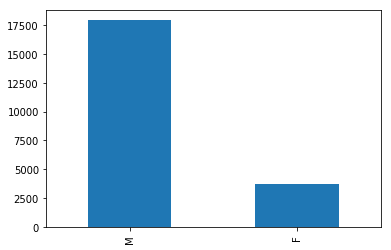

In [112]:
# Visualize sex differences across all cases
concatenated_df['Subject Sex'].value_counts().plot(kind='bar')
plt.show()

There are much more males resisting arrest than females. Later we'll see how this gender difference varies across area, type of arrest, and potentially effects upon both the subject and officer.

In [113]:
# Count of 'Subject Race'
print(concatenated_df['Subject Race'].value_counts())

W    14756
B     6551
A      188
M       44
U       43
I        8
P        5
Name: Subject Race, dtype: int64


In [114]:
# Drop records where subject race isn't 'W' or 'B' due to low amount of records, helps simplify one-hot encoding
concatenated_df = concatenated_df[concatenated_df['Subject Race'].isin(['W', 'B'])]

print(concatenated_df['Subject Race'].value_counts())

W    14756
B     6551
Name: Subject Race, dtype: int64


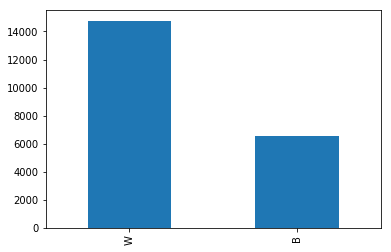

In [115]:
# Plot of 'Subject Race'
concatenated_df['Subject Race'].value_counts().plot(kind='bar')
plt.show()

While there are far more records that have a white race here, the black population in Austin is incredibly low, so this is massively disproportionate to demographic differences within the population. It'll be interesting to see how race correlates with the other variables.

In [116]:
# Count of 'Subject Conduct Desc'
print(concatenated_df['Subject Conduct Desc'].value_counts())

SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS                             11712
EDP/MENTALLY UNSTABLE                                                   3028
EDP/MENTALLY UNSTABLE; SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS       2125
; EDP/MENTALLY UNSTABLE                                                    1
; EDP/MENTALLY UNSTABLE; SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS        1
Name: Subject Conduct Desc, dtype: int64


In [117]:
# Cleaned up records that have a '; ' at start of line
concatenated_df.loc[concatenated_df['Subject Conduct Desc'] == '; EDP/MENTALLY UNSTABLE; SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS', \
                   ['Subject Conduct Desc']] = 'EDP/MENTALLY UNSTABLE; SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS'

concatenated_df.loc[concatenated_df['Subject Conduct Desc'] == '; EDP/MENTALLY UNSTABLE', \
                   ['Subject Conduct Desc']] = 'EDP/MENTALLY UNSTABLE'

print(concatenated_df['Subject Conduct Desc'].value_counts())

SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS                           11712
EDP/MENTALLY UNSTABLE                                                 3029
EDP/MENTALLY UNSTABLE; SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS     2126
Name: Subject Conduct Desc, dtype: int64


I'm surprised there are only these two subject conduct descriptions. We may want to see their interaction across other variables.

In [118]:
# Count of type of 'Subject Resistance'
print(concatenated_df['Subject Resistance'].value_counts().head())

EMPTY HAND DEFENSIVE RESISTANCE                                  6696
EMPTY HAND ACTIVE AGGRESSION                                     3681
OTHER                                                            1464
VERBAL RESISTANCE/AGGRESSION; EMPTY HAND DEFENSIVE RESISTANCE    1454
PASSIVE RESISTANCE                                               1283
Name: Subject Resistance, dtype: int64


In [119]:
# Count of weapon used type
print(concatenated_df['Weapon Used 1'].value_counts().head())

WEAPONLESS (PRESSURE POINTS/KICKS/HAND)    16312
CED - PRONGS-ENTER # SHOTS                  1902
CHEMICAL AGENT - O C SPRAY                   970
CED - DRIVE STUN-ENTER # SHOTS               562
OTHER                                        473
Name: Weapon Used 1, dtype: int64


In [120]:
# Count of instances for 'Number Shots' 
print(concatenated_df['Number Shots'].value_counts())

1.0     2296
0.0      732
2.0      720
3.0      245
4.0       89
5.0       38
6.0       17
7.0       14
8.0        7
9.0        6
10.0       3
14.0       3
12.0       3
13.0       2
15.0       1
11.0       1
Name: Number Shots, dtype: int64


May be interesting to look at the type of weapon used (by the arresting officer) and the number of shots interacting with different sex and gender.

In [121]:
# Count of effect on subject
print(concatenated_df['Subject Effects'].value_counts())

NO COMPLAINT OF INJURY/PAIN                                                           11960
MINOR INJURY                                                                           3993
COMPLAINT OF INJURY/PAIN                                                               2526
COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED                                             1818
MINOR INJURY; COMPLAINT OF INJURY/PAIN                                                  692
MINOR INJURY; NO COMPLAINT OF INJURY/PAIN                                               145
SERIOUS INJURY                                                                           46
DEATH                                                                                    28
COMPLAINT OF INJURY/PAIN; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED                     19
COMPLAINT OF INJURY/PAIN; NO COMPLAINT OF INJURY/PAIN                                    11
MINOR INJURY; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED                        

In [122]:
# Drop combination records and low count records (other than serious injury or death) to make one hot encoding easier
concatenated_df = concatenated_df[concatenated_df['Subject Effects'].isin(['NO COMPLAINT OF INJURY/PAIN', 'MINOR INJURY', 
                                                       'COMPLAINT OF INJURY/PAIN', 'COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED',
                                                       'MINOR INJURY; COMPLAINT OF INJURY/PAIN', 'MINOR INJURY; NO COMPLAINT OF INJURY/PAIN',
                                                       'SERIOUS INJURY', 'DEATH'])]

print(concatenated_df['Subject Effects'].value_counts())

NO COMPLAINT OF INJURY/PAIN                   11960
MINOR INJURY                                   3993
COMPLAINT OF INJURY/PAIN                       2526
COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED     1818
MINOR INJURY; COMPLAINT OF INJURY/PAIN          692
MINOR INJURY; NO COMPLAINT OF INJURY/PAIN       145
SERIOUS INJURY                                   46
DEATH                                            28
Name: Subject Effects, dtype: int64


In [123]:
# Count of effect on officer
print(concatenated_df['Effect on Officer'].value_counts())

NO COMPLAINT OF INJURY/PAIN                                                18278
MINOR INJURY                                                                1299
COMPLAINT OF INJURY/PAIN                                                     724
MINOR INJURY; COMPLAINT OF INJURY/PAIN                                       184
COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED                                   122
MINOR INJURY; NO COMPLAINT OF INJURY/PAIN                                     22
COMPLAINT OF INJURY/PAIN; NO COMPLAINT OF INJURY/PAIN                         17
SERIOUS INJURY                                                                15
COMPLAINT OF INJURY/PAIN; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED           5
SERIOUS INJURY; COMPLAINT OF INJURY/PAIN                                       2
COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED; NO COMPLAINT OF INJURY/PAIN        1
MINOR INJURY; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED                       1
SERIOUS INJURY; MINOR INJURY

In [124]:
# Count of record per patrol area, these areas are defined at http://www.austintexas.gov/edims/document.cfm?id=168703

print(concatenated_df['Officer Organization Desc'].value_counts().head(10))

GEORGE 600 REG I PATROL       827
GEORGE 400 REG I PATROL       777
GEORGE 700 REG I PATROL       634
GEORGE 500 REG I PATROL       615
GEORGE 300 REG I PATROL       522
CHARLIE 400 REG III PATROL    495
CHARLIE 700 REG III PATROL    459
EDWARD 800 REG II PATROL      447
FRANK 700 REG IV PATROL       427
EDWARD 700 REG II PATROL      409
Name: Officer Organization Desc, dtype: int64


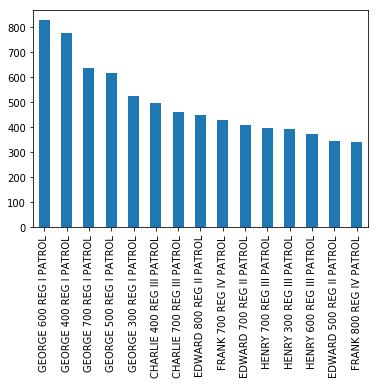

In [125]:
# Plot of officer organization description

concatenated_df['Officer Organization Desc'].value_counts().head(15).plot(kind='bar')
plt.show()

In [126]:
# Looking at counts of cases by officer commission date
print(concatenated_df['Officer Commission Date'].value_counts().head(25))

04/23/2010 12:00:00 AM    1746
01/04/2008 12:00:00 AM    1636
01/02/2009 12:00:00 AM    1305
04/27/2007 12:00:00 AM    1180
10/07/2011 12:00:00 AM    1129
06/23/2006 12:00:00 AM     988
06/18/2004 12:00:00 AM     970
11/30/2012 12:00:00 AM     904
06/20/2008 12:00:00 AM     690
03/23/2012 12:00:00 AM     679
07/08/2005 12:00:00 AM     580
03/22/2013 12:00:00 AM     469
05/10/2002 12:00:00 AM     457
06/27/2003 12:00:00 AM     422
11/22/2002 12:00:00 AM     381
11/12/2010 12:00:00 AM     338
09/24/1999 12:00:00 AM     319
12/13/2013 12:00:00 AM     278
03/21/2014 12:00:00 AM     242
07/09/1999 12:00:00 AM     221
10/19/2001 12:00:00 AM     212
03/27/1998 12:00:00 AM     206
02/08/2002 12:00:00 AM     200
07/13/2012 12:00:00 AM     189
05/17/2013 12:00:00 AM     189
Name: Officer Commission Date, dtype: int64


It seems strange to me that a few of these commission dates show up far more than others. I'd like to look at trends across years, and see if it might be due to the areas where they patrol, or if it might be something specific to certain commmission date officers/cohorts of officers. Should also keep drop off over time in mind.

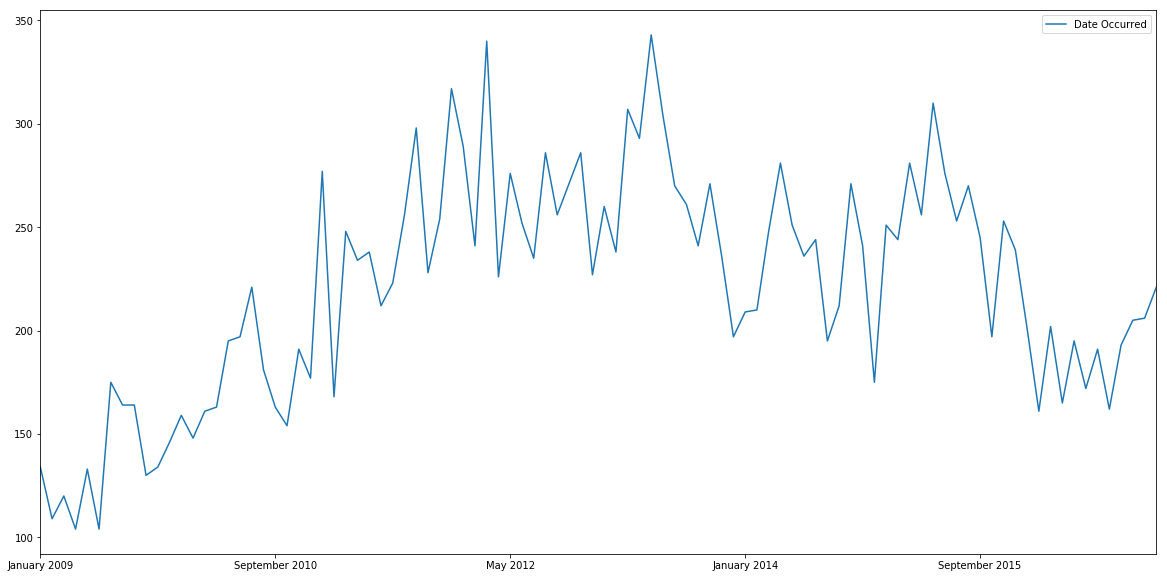

In [127]:
concatenated_df['Date Occurred'] = pd.to_datetime(concatenated_df['Date Occurred'])

# I want to sort these value counts by date rather than count, but couldn't find out how to do so.
# When I plot it now (using .plot.line()) it shows values going down, even if I specify a y axis of date
month_y_count_df = pd.DataFrame(concatenated_df['Date Occurred'].dt.strftime('%B %Y').value_counts())

# sort_index sorts alphabetically
month_y_count_df.sort_index().head()

# sort_values sorts by count
month_y_count_df.sort_values(by='Date Occurred').head()

# try making the index a date column
month_y_count_df['Month Year'] = month_y_count_df.index
month_y_count_df['Month Year'] = pd.to_datetime(month_y_count_df['Month Year'])

month_y_count_df.sort_values(by='Month Year').plot(figsize=(20,10), kind='line')
plt.show()

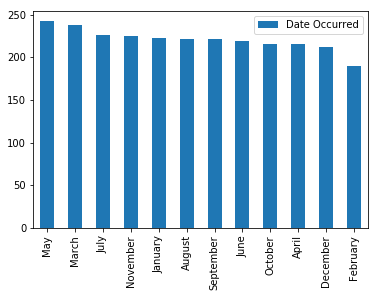

In [128]:
# Grab counts only by month
month_counts = pd.DataFrame(concatenated_df['Date Occurred'].dt.strftime('%B').value_counts())

# Divide by amount of years for average
month_counts_avg = month_counts/8
month_counts_avg.plot(kind='bar')

plt.show()

In [129]:
print(concatenated_df['Officer Commission Date'].value_counts().mean())
print(concatenated_df['Officer Commission Date'].value_counts().median())

96.73972602739725
9.0


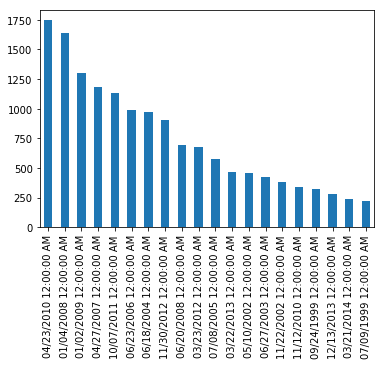

In [130]:
# divide by amount of years for average
concatenated_df['Officer Commission Date'].value_counts().head(20).plot(kind='bar')
plt.show()

In [131]:
concatenated_df['X-Coordinate'] = pd.to_numeric(concatenated_df['X-Coordinate'], errors='coerce')
concatenated_df['X-Coordinate'] = concatenated_df['X-Coordinate'][concatenated_df['X-Coordinate'] > 3090000]
concatenated_df['X-Coordinate'] = concatenated_df['X-Coordinate'][concatenated_df['X-Coordinate'] < 3160000]

concatenated_df['Y-Coordinate'] = pd.to_numeric(concatenated_df['Y-Coordinate'], errors='coerce')
concatenated_df['Y-Coordinate'] = concatenated_df['Y-Coordinate'][concatenated_df['Y-Coordinate'] > 10000000]
concatenated_df['Y-Coordinate'] = concatenated_df['Y-Coordinate'][concatenated_df['Y-Coordinate'] < 10200000]

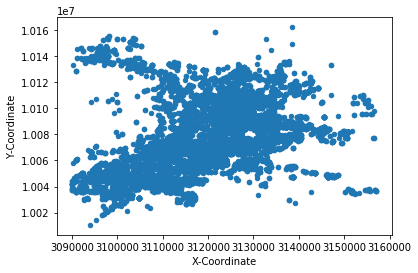

In [132]:
concatenated_df.plot.scatter('X-Coordinate', 'Y-Coordinate')
plt.show()

In [133]:
print(concatenated_df['X-Coordinate'].min())
print(concatenated_df['X-Coordinate'].max())
print(concatenated_df['Y-Coordinate'].min())
print(concatenated_df['Y-Coordinate'].max())

3090039.0
3157100.0
10010585.0
10162081.0


This looks like it will be awesome to overlay over a map once I'm able to convert it to actual latitude and longitude. I'm investigating how to do that now, as the provided data doesn't seem to translate directly into degrees and minutes. It looks like my coordinates should end up being around 30 and -97.

I'll probably also want to bin the data or alter the point markers and zoom in for sections, as there is a lot of overlap. I may be able to get away with this overlap when looking at different categories/filtering the scatter plots across both year and other variables.

____

Overall, I've avoided applying inferential statistics methods for now as the data set is purely qualitative. That said, after discussing my project with my mentor, I think we'll look towards implementing one hot encoding in the future, and I've added a few more charts visualizing the differences across certain variables. I've also identified the scaling for the x and y coordinates, and found the appopriate system and formula to convert them.

In [134]:
concatenated_df.keys()

Index(['RIN', 'Primary Key', 'Date Occurred', 'Time Occurred', 'Location',
       'Area Command', 'Nature of Contact', 'Reason Desc', 'R2R Level',
       'Master Subject ID', 'Subject Sex', 'Subject Race', 'Subject Ethnicity',
       'Subject Conduct Desc', 'Subject Resistance', 'Weapon Used 1',
       'Weapon Used 2', 'Weapon Used 3', 'Weapon Used 4', 'Weapon Used 5',
       'Number Shots', 'Subject Effects', 'Effect on Officer',
       'Officer Organization Desc', 'Officer Commission Date',
       'Officer Yrs of Service', 'X-Coordinate', 'Y-Coordinate',
       'CouncilDistrict'],
      dtype='object')

In [138]:
dummy_cols = ['Subject Sex', 'Subject Race', 'Subject Conduct Desc', 'Weapon Used 1', 'Subject Effects']

one_hot_df = pd.get_dummies(concatenated_df[dummy_cols], columns=dummy_cols)

In [140]:
one_hot_df.keys()

Index(['Subject Sex_F', 'Subject Sex_M', 'Subject Race_B', 'Subject Race_W',
       'Subject Conduct Desc_EDP/MENTALLY UNSTABLE',
       'Subject Conduct Desc_EDP/MENTALLY UNSTABLE; SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS',
       'Subject Conduct Desc_SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS',
       'Weapon Used 1_-', 'Weapon Used 1_CANINE - BITE',
       'Weapon Used 1_CED - DRIVE STUN-ENTER # CYCLES (use #shots field)',
       'Weapon Used 1_CED - DRIVE STUN-ENTER # SHOTS',
       'Weapon Used 1_CED - PRONGS MISSED-ENTER # CYCLES (use #shots field)',
       'Weapon Used 1_CED - PRONGS MISSED-ENTER # SHOTS',
       'Weapon Used 1_CED - PRONGS-ENTER # CYCLES (use #shots field)',
       'Weapon Used 1_CED - PRONGS-ENTER # SHOTS',
       'Weapon Used 1_CHEMICAL AGENT - O C SPRAY',
       'Weapon Used 1_CHEMICAL AGENT - OTHER',
       'Weapon Used 1_FIREARM -  SHOTGUN-ENTER # SHOTS',
       'Weapon Used 1_FIREARM - HANDGUN-ENTER # SHOTS',
       'Weapon Used 1_FIREARM - RIFLE-ENTER

In [145]:
features_df = one_hot_df[['Subject Sex_F', 'Subject Sex_M', 'Subject Race_B', 'Subject Race_W',
       'Subject Conduct Desc_EDP/MENTALLY UNSTABLE',
       'Subject Conduct Desc_EDP/MENTALLY UNSTABLE; SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS',
       'Subject Conduct Desc_SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS']]

features_df.keys()

Index(['Subject Sex_F', 'Subject Sex_M', 'Subject Race_B', 'Subject Race_W',
       'Subject Conduct Desc_EDP/MENTALLY UNSTABLE',
       'Subject Conduct Desc_EDP/MENTALLY UNSTABLE; SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS',
       'Subject Conduct Desc_SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS'],
      dtype='object')

In [146]:
weapon_used_df = one_hot_df[['Weapon Used 1_-', 'Weapon Used 1_CANINE - BITE',
       'Weapon Used 1_CED - DRIVE STUN-ENTER # CYCLES (use #shots field)',
       'Weapon Used 1_CED - DRIVE STUN-ENTER # SHOTS',
       'Weapon Used 1_CED - PRONGS MISSED-ENTER # CYCLES (use #shots field)',
       'Weapon Used 1_CED - PRONGS MISSED-ENTER # SHOTS',
       'Weapon Used 1_CED - PRONGS-ENTER # CYCLES (use #shots field)',
       'Weapon Used 1_CED - PRONGS-ENTER # SHOTS',
       'Weapon Used 1_CHEMICAL AGENT - O C SPRAY',
       'Weapon Used 1_CHEMICAL AGENT - OTHER',
       'Weapon Used 1_FIREARM -  SHOTGUN-ENTER # SHOTS',
       'Weapon Used 1_FIREARM - HANDGUN-ENTER # SHOTS',
       'Weapon Used 1_FIREARM - RIFLE-ENTER # SHOTS',
       'Weapon Used 1_IMPACT MUNITION/BEANBAG RND-ENTER # SHOTS',
       'Weapon Used 1_IMPACT MUNITION/RUBBER RND-ENTER # SHOTS',
       'Weapon Used 1_IMPACT WEAPON - BATON',
       'Weapon Used 1_IMPACT WEAPON - OTHER', 'Weapon Used 1_OTHER',
       'Weapon Used 1_PURSUIT IMMOBILIZATION TECHNIQUE (PIT)',
       'Weapon Used 1_WEAPONLESS (PRESSURE POINTS/KICKS/HAND)']]

In [147]:
subject_effects_df = one_hot_df[['Subject Effects_COMPLAINT OF INJURY/PAIN',
       'Subject Effects_COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED',
       'Subject Effects_DEATH', 'Subject Effects_MINOR INJURY',
       'Subject Effects_MINOR INJURY; COMPLAINT OF INJURY/PAIN',
       'Subject Effects_MINOR INJURY; NO COMPLAINT OF INJURY/PAIN',
       'Subject Effects_NO COMPLAINT OF INJURY/PAIN',
       'Subject Effects_SERIOUS INJURY']]

In [148]:
subject_effects_df.head()

,Subject Effects_COMPLAINT OF INJURY/PAIN,Subject Effects_COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED,Subject Effects_DEATH,Subject Effects_MINOR INJURY,Subject Effects_MINOR INJURY; COMPLAINT OF INJURY/PAIN,Subject Effects_MINOR INJURY; NO COMPLAINT OF INJURY/PAIN,Subject Effects_NO COMPLAINT OF INJURY/PAIN,Subject Effects_SERIOUS INJURY
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [151]:
X = np.array(features_df.iloc[:, :])
y = np.array(subject_effects_df.iloc[:, :])

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.33, random_state=42)

In [208]:
# hacker stats to find best performing K
neighbors_list = list(range(1,100))

score_list = []

for i in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score_list.append(accuracy_score(pred, y_test))

Finished


In [209]:
highest_score = max(score_list)
list_index = score_list.index(highest_score)

print(highest_score)
print(list_index)

print(score_list)

0.561827011049
50
[0.36103877823914421, 0.068477725385319169, 0.4897600112604687, 0.28826799915546486, 0.36286860440565838, 0.14054472517418537, 0.17439650925469774, 0.1411781265395172, 0.25272714476740094, 0.20585544373284537, 0.28594552748258145, 0.23907382644802591, 0.28594552748258145, 0.22133858821873462, 0.49778309522133857, 0.25547188401717219, 0.48708564994017878, 0.47174326131325217, 0.47174326131325217, 0.47174326131325217, 0.48708564994017878, 0.42240833274685058, 0.47174326131325217, 0.47174326131325217, 0.48708564994017878, 0.43852487859807165, 0.45386726722499826, 0.43852487859807165, 0.45386726722499826, 0.40699556619044269, 0.44021394890562321, 0.3576606376240411, 0.44021394890562321, 0.44021394890562321, 0.450911394186783, 0.40157646562038146, 0.450911394186783, 0.450911394186783, 0.450911394186783, 0.39087902033922162, 0.450911394186783, 0.450911394186783, 0.450911394186783, 0.450911394186783, 0.51495531001477934, 0.40157646562038146, 0.49778309522133857, 0.4015764656

Multiple values for highest performer (0.561827011049), finding indexes to use lowest number for n_neighbors below

In [210]:
j = 0
highest_n = []

for i in score_list:
    if i == highest_score:
        highest_n.append(j)
    j += 1

print(highest_n)

[50, 62, 68, 70, 84, 85, 86, 87, 88, 89, 90, 96, 98]


In [235]:
# using 51 n_neighbors re: above findings
knn = KNeighborsClassifier(n_neighbors=51, p=25)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(accuracy_score(pred, y_test))

0.561827011049


56% accuracy isn't the greatest  performance, let's see if reducing the number of features helps

In [239]:
reduced_features_df_1 = one_hot_df[['Subject Sex_F', 'Subject Sex_M', 'Subject Race_B', 'Subject Race_W']]

X = np.array(reduced_features_df_1.iloc[:, :])
y = np.array(subject_effects_df.iloc[:, :])

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.33, random_state=42)

neighbors_list = list(range(1,100))

In [240]:
score_list = []

for i in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score_list.append(accuracy_score(pred, y_test))

In [242]:
highest_score = max(score_list)
list_index = score_list.index(highest_score)

print(highest_score)
print(list_index)

print(score_list)

[[1 0]
 [0 1]
 [1 0]
 ..., 
 [0 1]
 [0 1]
 [0 1]]
0.561827011049
2
[0.48215919487648673, 0.0, 0.56182701104933497, 0.10394820184390176, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.10394820184390176, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.10394820184390176, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.10394820184390176, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.10394820184390176, 0.10394820184390176, 0.10394820184390176, 0.10394820184390176, 0.10394820184390176, 0.10394820184390176, 0.10394820184390176, 0.10394820184390176, 0.10394820184390176, 0.10394820184390176, 0.1

No effect, thinking the sparsity of the target set may be the issue here. Going to change the dataset to not be a matrix.

In [244]:
subject_effects_df.keys()

Index(['Subject Effects_COMPLAINT OF INJURY/PAIN',
       'Subject Effects_COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED',
       'Subject Effects_DEATH', 'Subject Effects_MINOR INJURY',
       'Subject Effects_MINOR INJURY; COMPLAINT OF INJURY/PAIN',
       'Subject Effects_MINOR INJURY; NO COMPLAINT OF INJURY/PAIN',
       'Subject Effects_NO COMPLAINT OF INJURY/PAIN',
       'Subject Effects_SERIOUS INJURY'],
      dtype='object')

In [249]:
subject_effects = []

for index, row in subject_effects_df.iterrows():
    if row['Subject Effects_NO COMPLAINT OF INJURY/PAIN'] == 1:
        subject_effects.append(1)
    elif row['Subject Effects_COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED'] == 1:
        subject_effects.append(2)
    elif row['Subject Effects_COMPLAINT OF INJURY/PAIN'] == 1:
        subject_effects.append(3)
    elif row['Subject Effects_MINOR INJURY; NO COMPLAINT OF INJURY/PAIN'] == 1:
        subject_effects.append(4)
    elif row['Subject Effects_MINOR INJURY'] == 1:
        subject_effects.append(5)
    elif row['Subject Effects_MINOR INJURY; COMPLAINT OF INJURY/PAIN'] == 1:
        subject_effects.append(6)
    elif row['Subject Effects_SERIOUS INJURY'] == 1:
        subject_effects.append(7)
    elif row['Subject Effects_DEATH'] == 1:
        subject_effects.append(8)

print(subject_effects)

[1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 5, 5, 1, 1, 1, 1, 1, 5, 5, 1, 6, 1, 1, 5, 1, 3, 3, 2, 3, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 3, 3, 1, 1, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 5, 1, 4, 4, 5, 1, 3, 1, 3, 5, 6, 5, 1, 1, 1, 1, 1, 7, 1, 3, 3, 5, 1, 1, 1, 1, 1, 2, 2, 1, 5, 2, 5, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 5, 5, 1, 1, 4, 5, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 2, 1, 3, 2, 1, 1, 3, 2, 3, 1, 5, 1, 1, 3, 5, 2, 3, 3, 3, 3, 1, 1, 5, 3, 3, 5, 1, 5, 3, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 5, 5, 5, 2, 2, 6, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 5, 1, 5, 3, 6, 6, 6, 6, 1, 3, 1, 3, 3, 5, 3, 3, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 4, 1, 1, 1, 5, 5, 3, 6, 1, 1, 1, 3, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 2, 2, 5, 1, 5, 5, 1, 3, 1, 1, 1, 2, 1, 2, 6, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 5, 1, 1, 5, 1, 1, 3, 3, 6, 1, 3, 3, 5, 5, 5, 1, 5, 3, 3, 6, 5, 1, 1, 1, 3, 3, 5, 5, 5, 1, 1, 5, 1, 1, 3, 

Let's try this again using the ordinal array as the target

In [250]:
X = np.array(features_df.iloc[:, :])
y = np.array(subject_effects)

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.33, random_state=42)

In [251]:
# hacker stats to find best performing K
neighbors_list = list(range(1,100))

score_list = []

for i in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score_list.append(accuracy_score(pred, y_test))

In [252]:
highest_score = max(score_list)
list_index = score_list.index(highest_score)

print(highest_score)
print(list_index)

print(score_list)

0.561827011049
6
[0.36103877823914421, 0.53705397987191217, 0.51657400239284956, 0.51657400239284956, 0.5211485678091351, 0.5211485678091351, 0.56182701104933497, 0.5211485678091351, 0.56182701104933497, 0.5211485678091351, 0.5211485678091351, 0.5211485678091351, 0.5211485678091351, 0.5211485678091351, 0.56182701104933497, 0.5211485678091351, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56

No improvement, let's try again, but this time combine some of our similar subject effects and spread out ordinal values

In [253]:
subject_effects = []

for index, row in subject_effects_df.iterrows():
    if row['Subject Effects_NO COMPLAINT OF INJURY/PAIN'] == 1:
        subject_effects.append(1)
    elif row['Subject Effects_COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED'] == 1:
        subject_effects.append(4)
    elif row['Subject Effects_COMPLAINT OF INJURY/PAIN'] == 1:
        subject_effects.append(4)
    elif row['Subject Effects_MINOR INJURY; NO COMPLAINT OF INJURY/PAIN'] == 1:
        subject_effects.append(7)
    elif row['Subject Effects_MINOR INJURY'] == 1:
        subject_effects.append(7)
    elif row['Subject Effects_MINOR INJURY; COMPLAINT OF INJURY/PAIN'] == 1:
        subject_effects.append(7)
    elif row['Subject Effects_SERIOUS INJURY'] == 1:
        subject_effects.append(10)
    elif row['Subject Effects_DEATH'] == 1:
        subject_effects.append(13)

print(subject_effects)

[1, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 10, 7, 7, 7, 1, 1, 1, 1, 1, 7, 7, 1, 7, 1, 1, 7, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 1, 4, 4, 1, 4, 4, 1, 1, 1, 1, 7, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 7, 1, 7, 7, 7, 1, 4, 1, 4, 7, 7, 7, 1, 1, 1, 1, 1, 10, 1, 4, 4, 7, 1, 1, 1, 1, 1, 4, 4, 1, 7, 4, 7, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 7, 7, 1, 1, 7, 7, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 4, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 1, 4, 4, 4, 1, 7, 1, 1, 4, 7, 4, 4, 4, 4, 4, 1, 1, 7, 4, 4, 7, 1, 7, 4, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 7, 7, 7, 4, 4, 7, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 7, 1, 7, 4, 7, 7, 7, 7, 1, 4, 1, 4, 4, 7, 4, 4, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 1, 1, 1, 7, 7, 4, 7, 1, 1, 1, 4, 1, 1, 1, 7, 1, 1, 4, 1, 1, 1, 4, 4, 7, 1, 7, 7, 1, 4, 1, 1, 1, 4, 1, 4, 7, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 7, 1, 1, 7, 1, 1, 4, 4, 7, 1, 4, 4, 7, 7, 7, 1, 7, 4, 4, 7, 7, 1, 1, 1, 4, 4, 7, 7, 7, 1, 1, 7, 1, 1, 4

In [257]:
X = np.array(reduced_features_df_1.iloc[:, :])
y = np.array(subject_effects)

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.33, random_state=42)

In [258]:
# hacker stats to find best performing K
neighbors_list = list(range(1,100))

score_list = []

for i in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score_list.append(accuracy_score(pred, y_test))

In [259]:
highest_score = max(score_list)
list_index = score_list.index(highest_score)

print(highest_score)
print(list_index)

print(score_list)

0.561827011049
1
[0.50439862059258211, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933497, 0.56182701104933

Still no effect, even with reduced fs as well, let's see how well KNN performs with the weapon used matrix

In [261]:
X = np.array(features_df.iloc[:, :])
y = np.array(weapon_used_df.iloc[:,:])

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.33, random_state=42)

In [262]:
# hacker stats to find best performing K
neighbors_list = list(range(1,100))

score_list = []

for i in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score_list.append(accuracy_score(pred, y_test))

In [263]:
highest_score = max(score_list)
list_index = score_list.index(highest_score)

print(highest_score)
print(list_index)

print(score_list)

0.763600534872
40
[0.61362516714758253, 0.45485255823773663, 0.56217890069674148, 0.53782813709620658, 0.56217890069674148, 0.56217890069674148, 0.61876275599971853, 0.61876275599971853, 0.61876275599971853, 0.61876275599971853, 0.68463649799422899, 0.68463649799422899, 0.68463649799422899, 0.68463649799422899, 0.68463649799422899, 0.68463649799422899, 0.68463649799422899, 0.68463649799422899, 0.68463649799422899, 0.61876275599971853, 0.61876275599971853, 0.61876275599971853, 0.61876275599971853, 0.61876275599971853, 0.61876275599971853, 0.61876275599971853, 0.69772679287775352, 0.69772679287775352, 0.69772679287775352, 0.69772679287775352, 0.69772679287775352, 0.69772679287775352, 0.69772679287775352, 0.69772679287775352, 0.69772679287775352, 0.69772679287775352, 0.69772679287775352, 0.69772679287775352, 0.69772679287775352, 0.69772679287775352, 0.76360053487226409, 0.76360053487226409, 0.76360053487226409, 0.76360053487226409, 0.76360053487226409, 0.69772679287775352, 0.6977267928777

In [264]:
j = 0
highest_n = []

for i in score_list:
    if i == highest_score:
        highest_n.append(j)
    j += 1

print(highest_n)

[40, 41, 42, 43, 44, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]


KNN does a decently improved job of predicting the weapon used (76.36%) based on the feature set. We confirmed the optimal n_neighbors parameter as 41 here. Lets do some cross validation on those n_neighbors parameters.

In [269]:
from sklearn.model_selection import cross_val_score

# create odd list of neighbors
neighbors = list(range(1,100,2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

Minimum misclassification error is 0.22888677702840787
[0.33260964643368074, 0.30060453709380741, 0.28874391988555081, 0.24817249131412222, 0.25517249131412223, 0.24817249131412222, 0.23660106274269366, 0.23660106274269366, 0.23660106274269366, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.2618867770284079, 0.29075311669732273, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.23545820559983643, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 0.22888677702840787, 

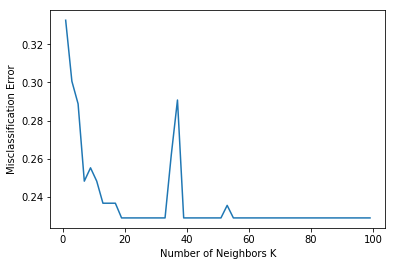

In [273]:
# Plotting the misclassification error for the different K values

# changing to misclassification error
MSE = [1 - x for x in cv_scores]
print('Minimum misclassification error is {}'.format(min(MSE)))

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

K of 41 has the highest performance, and lowest misclassification error.